In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df=  pd.read_csv('Voice_Sources1.csv', index_col=0)

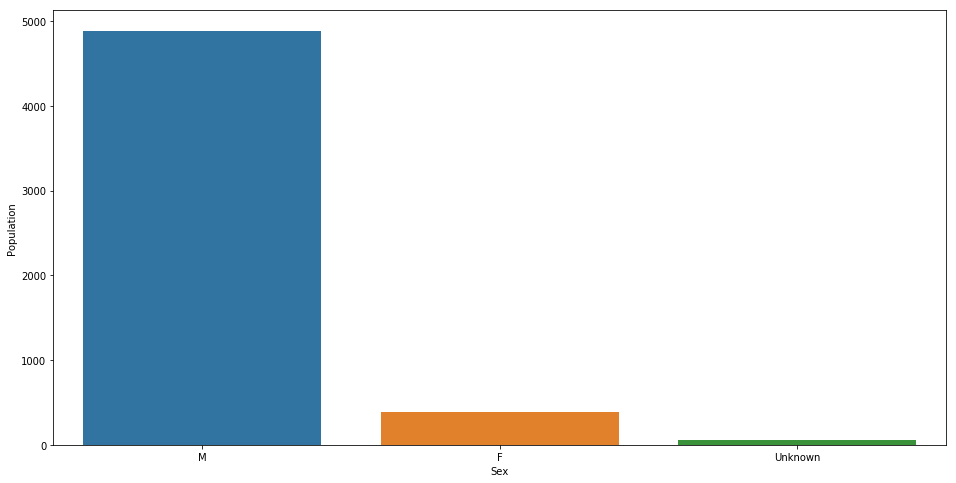

In [7]:
plt.figure(1,figsize=(16,8))
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Population')
plt.show()

The above plot shows that the dataset is imbalanced with respect to number of voices of Male and Female speakers
While in real world this is a balanced problem since the number of male and females in the worls are almost equal (50.4 % male for each 49.6 female ; Source: https://countrymeters.info/en/World)

In [8]:
df_sex_unknown = df[df.sex == 'Unknown']

In [9]:
df_sex_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 3 to 5299
Data columns (total 15 columns):
mean         62 non-null float64
std          62 non-null float64
median       62 non-null float64
first_q      62 non-null float64
third_q      62 non-null float64
inter_q      62 non-null float64
skewness     62 non-null float64
kurtosis     62 non-null float64
mode         62 non-null float64
peak         62 non-null float64
date         62 non-null int64
user         62 non-null object
age          62 non-null object
pronounce    62 non-null object
sex          62 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 7.8+ KB


## df_sex_unknown is about 1% of the whole data, I will put that aside for the moment, and at the end of project will try to predict and check if my ML can help to tag them correctly with respect to the sex as a double check of accuracy!

In [10]:
df = df[df.sex != 'Unknown']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 6244
Data columns (total 15 columns):
mean         5273 non-null float64
std          5273 non-null float64
median       5273 non-null float64
first_q      5273 non-null float64
third_q      5273 non-null float64
inter_q      5273 non-null float64
skewness     5273 non-null float64
kurtosis     5273 non-null float64
mode         5273 non-null float64
peak         5273 non-null float64
date         5273 non-null int64
user         5273 non-null object
age          5273 non-null object
pronounce    5273 non-null object
sex          5273 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 659.1+ KB


In [12]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 0 to 6244
Data columns (total 15 columns):
mean         5271 non-null float64
std          5271 non-null float64
median       5271 non-null float64
first_q      5271 non-null float64
third_q      5271 non-null float64
inter_q      5271 non-null float64
skewness     5271 non-null float64
kurtosis     5271 non-null float64
mode         5271 non-null float64
peak         5271 non-null float64
date         5271 non-null int64
user         5271 non-null object
age          5271 non-null object
pronounce    5271 non-null object
sex          5271 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 658.9+ KB


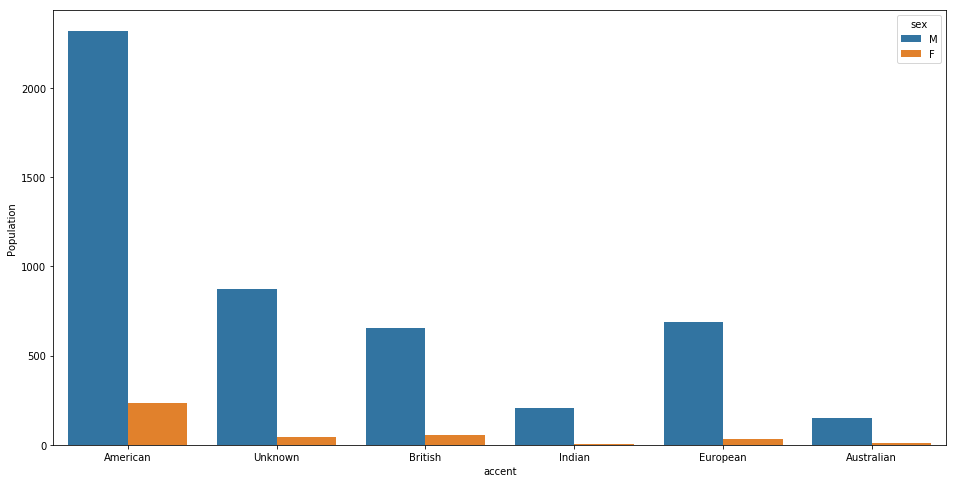

In [15]:
plt.figure(1,figsize=(16,8))
sns.countplot(x='pronounce', data=df, hue = df.sex)
plt.xlabel('accent')
plt.ylabel('Population')
plt.show()

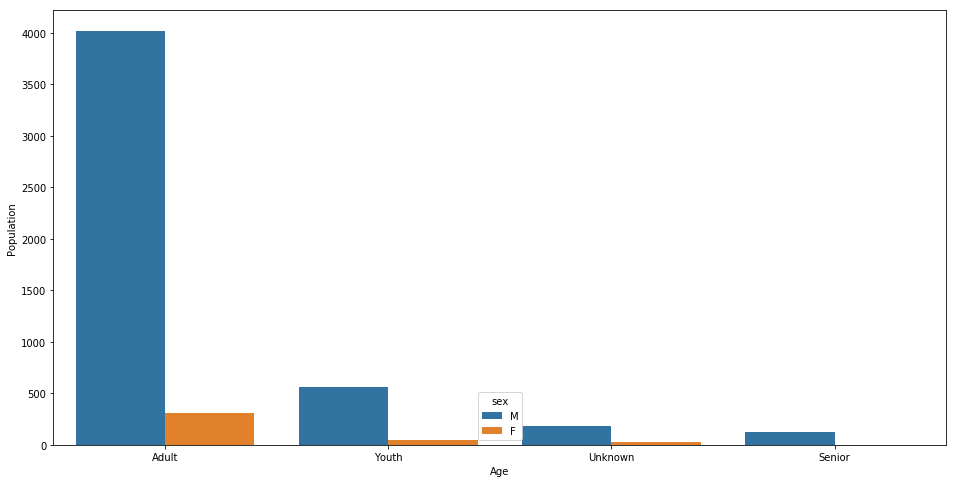

In [16]:
plt.figure(1,figsize=(16,8))
sns.countplot(x='age', data=df, hue = df.sex)
plt.xlabel('Age')
plt.ylabel('Population', )
plt.show()

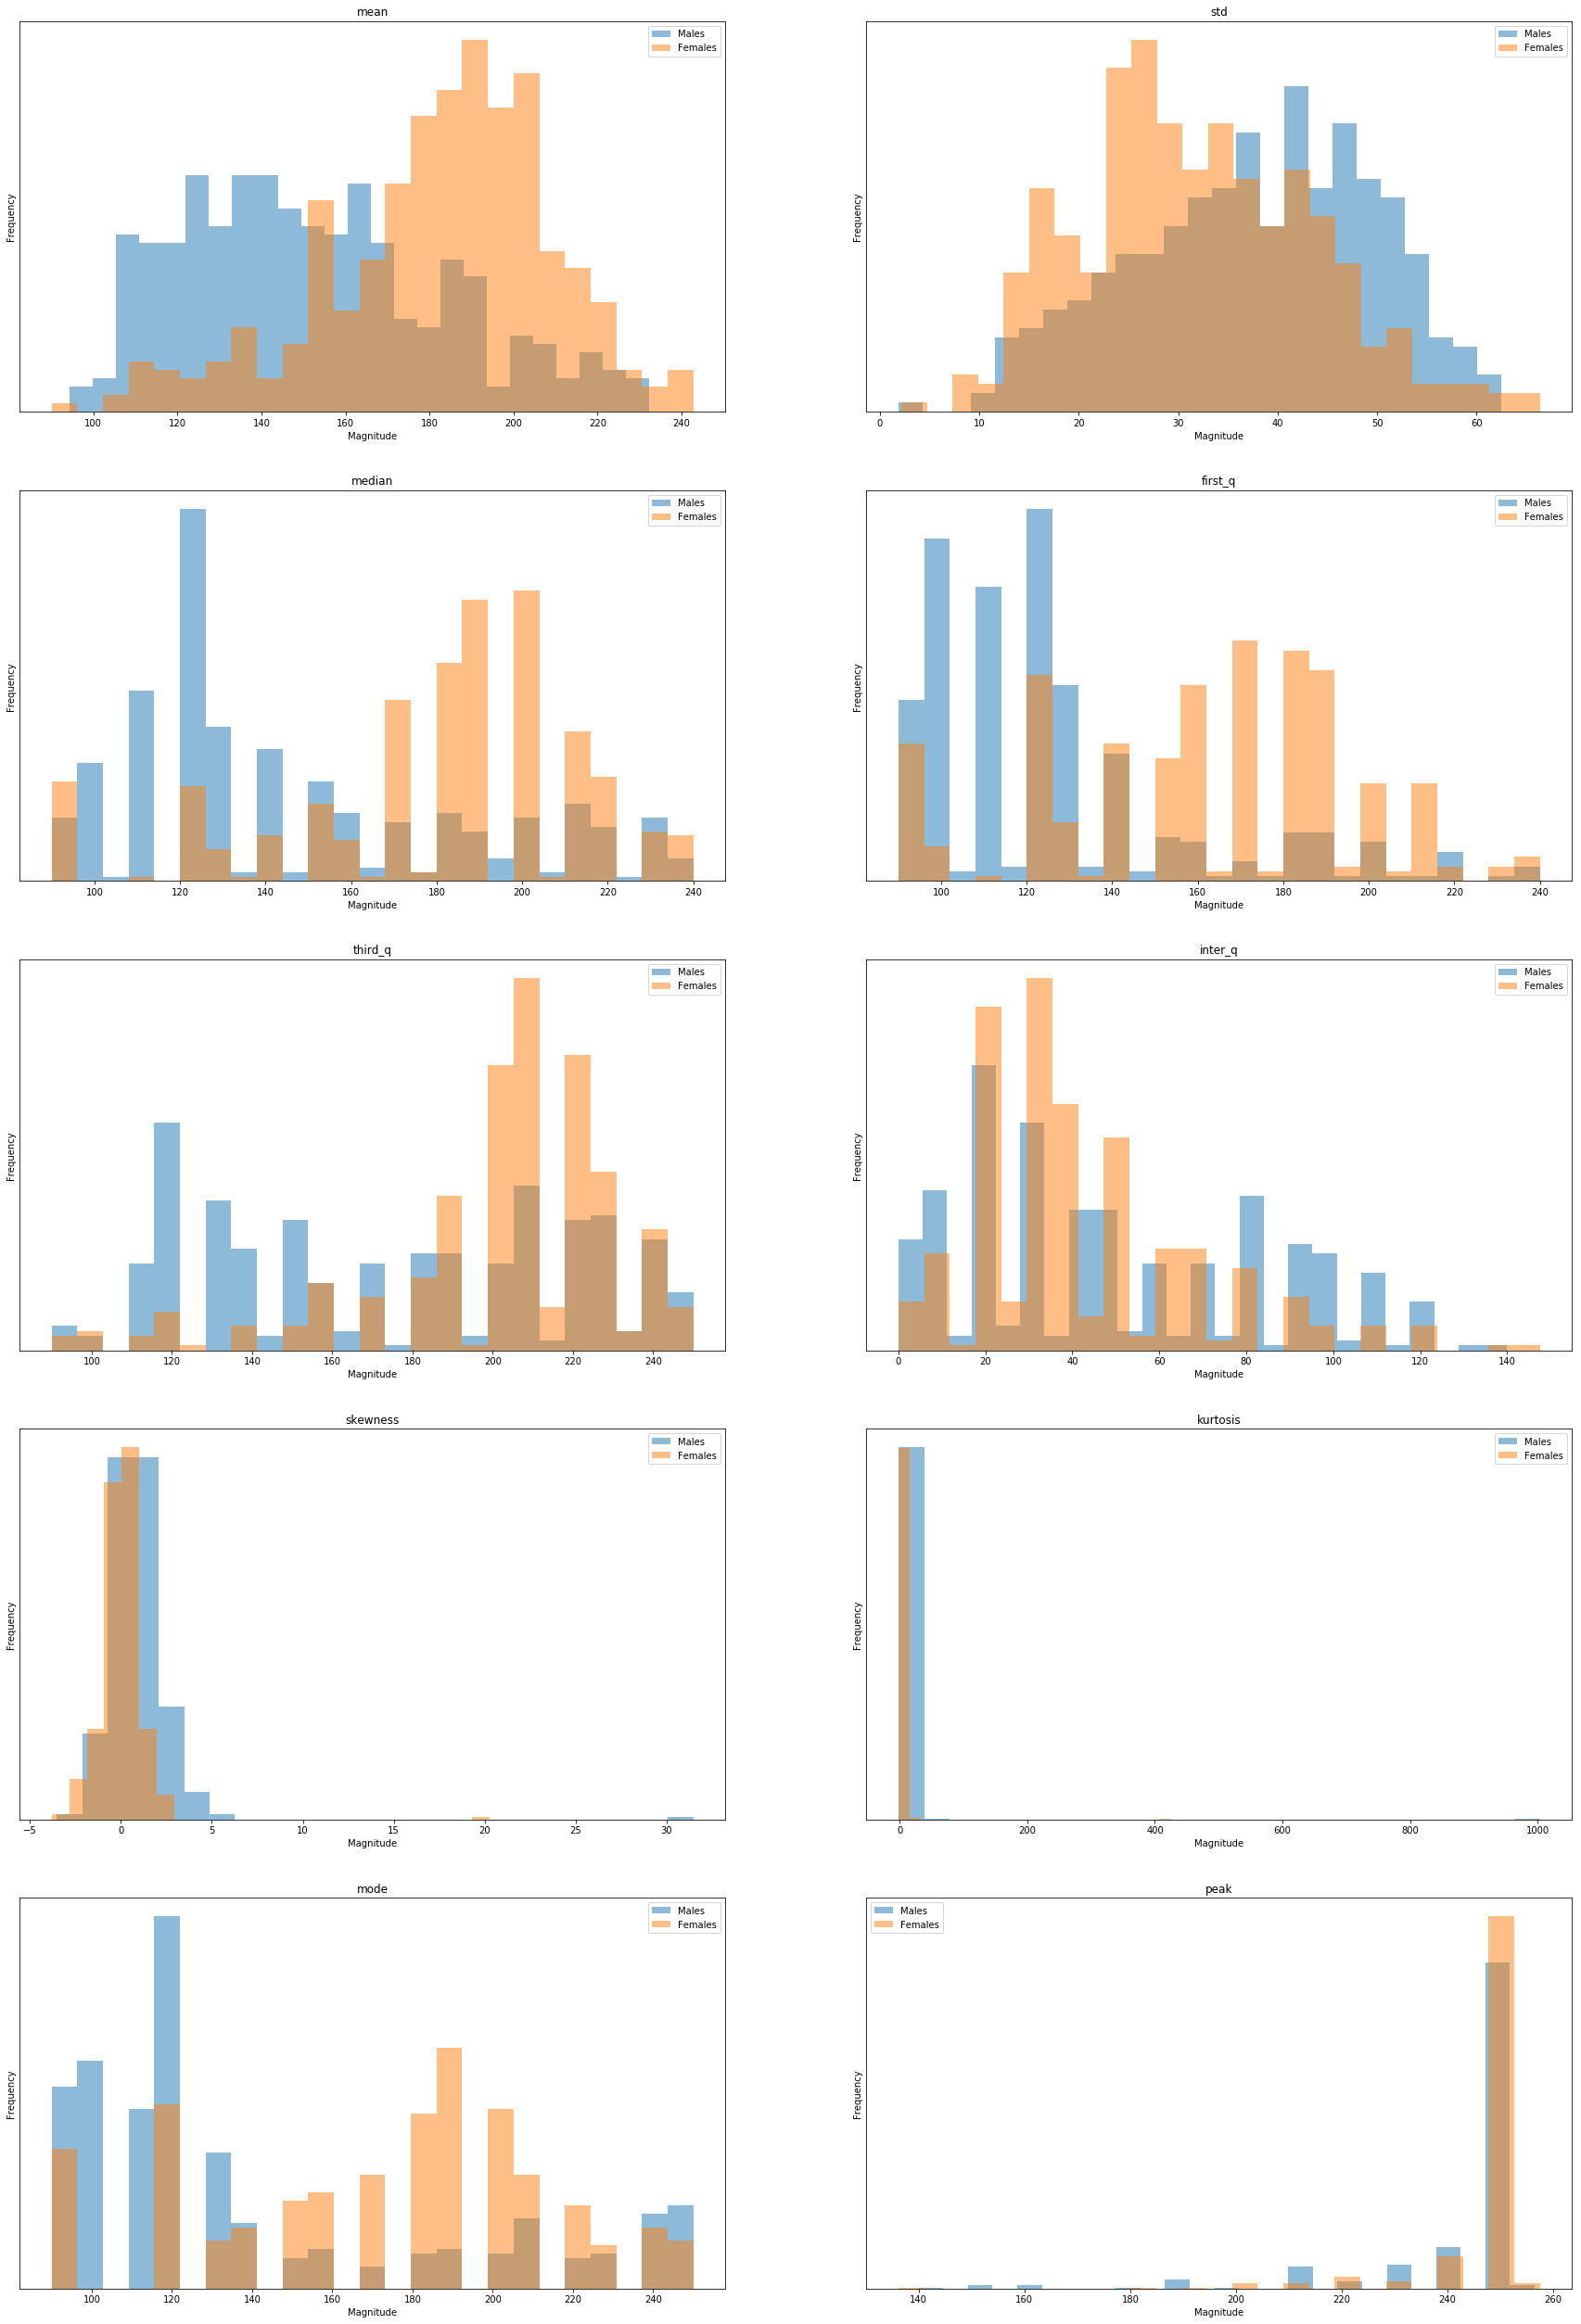

In [17]:
females = df.loc[df.sex=='F']
males = df.loc[df.sex=='M']
males_under_sample = males.sample(len(females))
parameters = ['mean','std','median','first_q', 'third_q', 'inter_q', 'skewness', 'kurtosis','mode','peak']

#Plot the histograms
fig, axes = plt.subplots(5, 2, figsize=(30,45))

ax = axes.flatten()

for i in range(len(parameters)):
    ax[i].hist(males_under_sample.loc[:,parameters[i]], bins=25, alpha =0.5)
    ax[i].hist(females.loc[:, parameters[i]], bins=25, alpha =0.5)
    ax[i].set_title(parameters[i])
    ax[i].set_yticks(())
    
    ax[i].set_xlabel("Magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["Males", "Females"])
plt.show()

## First to Encode 'sex' column to 0 for Male and 1 for Females

In [18]:
df.loc[:,'sex'][df['sex']== 'M'] = 0
df.loc[:,'sex'][df['sex']=='F'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df.head()

,mean,std,median,first_q,third_q,inter_q,skewness,kurtosis,mode,peak,date,user,age,pronounce,sex
0,162.598425,52.379785,180.0,110.0,210.0,100.0,-0.100126,-1.513975,90.0,250.0,20100710,1028,Adult,American,0
1,211.916667,24.504960,210.0,200.0,230.0,30.0,-1.768135,6.622069,210.0,250.0,20170321,1337ad,Adult,Unknown,1
2,207.575758,34.974476,210.0,200.0,230.0,30.0,-1.803365,3.801466,200.0,250.0,20170321,1337ad,Adult,Unknown,1
4,180.909091,37.039180,180.0,160.0,210.0,50.0,-0.372419,-0.448122,180.0,250.0,20120412,1snoke,Adult,American,0
5,148.972431,51.514539,130.0,100.0,200.0,100.0,0.583655,-1.043253,100.0,250.0,20100807,23yipikaye,Adult,Unknown,0


In [20]:
df.to_csv('Voices_Cleaned1.csv')
df_sex_unknown.to_csv('Voices_Unknown1.csv')